<a href="https://colab.research.google.com/github/EVA6-Group-15/YOLO_Object_Detection/blob/master/Session11_Opencv_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.69GB
Available: 11.90GB
Used: 570.05MB
Percentage: 6.2%


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Practice_Notebooks/Session-11/yolo_object_detection

/content/gdrive/MyDrive/Colab Notebooks/Practice_Notebooks/Session-11/yolo_object_detection


In [ ]:
%pwd

'/content/gdrive/My Drive/Colab Notebooks/Practice_Notebooks/Session-11/yolo_object_detection'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-08-19 20:44:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  36.5MB/s    in 7.2s    

2021-08-19 20:44:27 (32.6 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [ ]:
!pip install opencv-python

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5937, done.
remote: Total 5937 (delta 0), reused 0 (delta 0), pack-reused 5937
Receiving objects: 100% (5937/5937), 6.34 MiB | 5.63 MiB/s, done.
Resolving deltas: 100% (3940/3940), done.
Checking out files: 100% (979/979), done.


# Loading YOLO with OpenCV Object Detection

In [ ]:
%pwd

'/content/gdrive/My Drive/Colab Notebooks/Practice_Notebooks/Session-11/yolo_object_detection'

In [ ]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [ ]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
test_images = ["img1.jpg",
            "img2.jpg",
            "img3.jpg",
            "img4.jpg",
            "img5.jpg"]

# Loading Images for YOLO Object Detection

[[199, 65, 86, 49], [99, 33, 145, 207], [86, 85, 102, 181], [212, 140, 131, 128]]
[0.5817973613739014, 0.9949539303779602, 0.9450136423110962, 0.9804229140281677]
tvmonitor
person
chair
dog


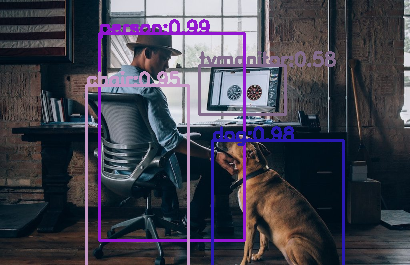



[[350, 21, 85, 158], [177, 16, 175, 213], [222, 77, 126, 171], [147, 15, 78, 79], [69, 61, 87, 77], [362, 26, 69, 147], [193, 110, 72, 20], [379, 142, 30, 29], [255, 86, 13, 16]]
[0.85090172290802, 0.9950411319732666, 0.9946881532669067, 0.9524987936019897, 0.7319121956825256, 0.9936352372169495, 0.7080942392349243, 0.7854940891265869, 0.6415552496910095]
person
tvmonitor
laptop
pottedplant
keyboard
vase
cup


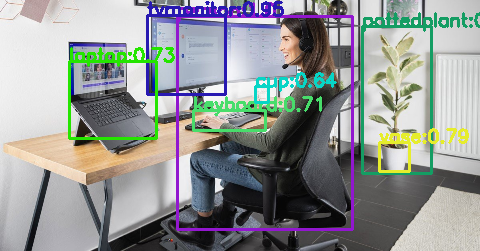



[[329, 13, 162, 97], [501, 26, 207, 463], [296, 221, 185, 224], [344, 16, 126, 85], [343, 21, 124, 86], [9, 217, 111, 50], [309, 240, 138, 196], [389, 196, 94, 28], [18, 212, 30, 17], [86, 213, 27, 17]]
[0.7434446215629578, 0.996974527835846, 0.6280426979064941, 0.6403898000717163, 0.5781649947166443, 0.9151779413223267, 0.7968544363975525, 0.7484850287437439, 0.5266271829605103, 0.7290884852409363]
microwave
refrigerator
bowl
oven
clock
orange
orange


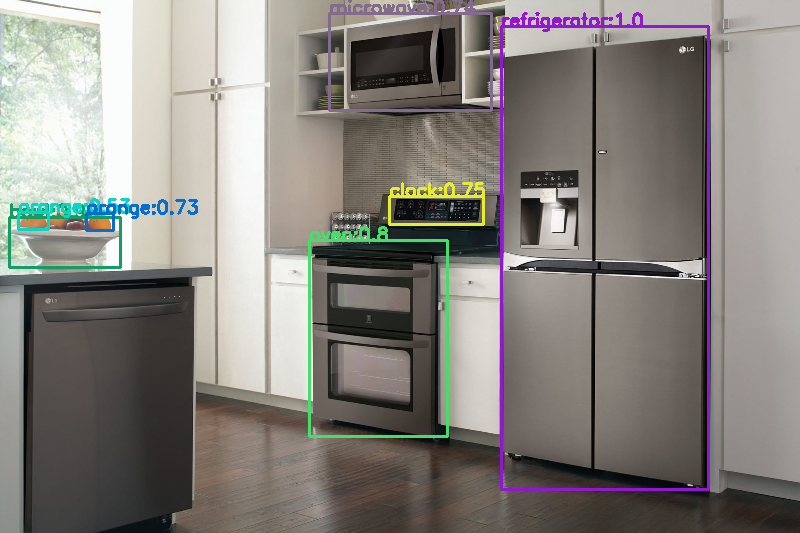



[[184, 37, 120, 130], [80, 75, 121, 91], [9, 48, 434, 257], [4, 71, 450, 245], [190, 47, 108, 110]]
[0.925155758857727, 0.5983779430389404, 0.6582463383674622, 0.5908247828483582, 0.9792169332504272]
apple
diningtable
apple


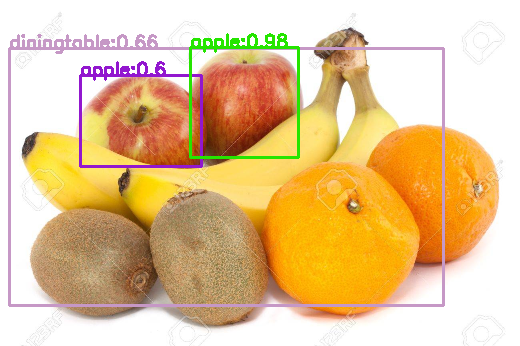



[[63, 221, 127, 76]]
[0.5541733503341675]
bowl


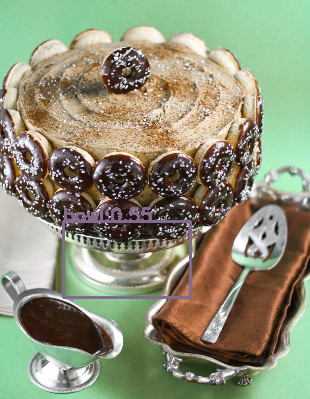

In [ ]:
for i in range(len(test_images)):
    # Loading image
    img = cv2.imread(test_images[i])
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(boxes) 
    print(confidences)
    # print(indexes)

    font = cv2.FONT_HERSHEY_SIMPLEX  
    for i in range(len(boxes)):
          if i in indexes:
              print(classes[class_ids[i]])
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]]+":"+str(round(confidences[i],2)))
              color = colors[i]
              cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
              cv2.putText(img, label, (x, y), font, 0.6, color, 2)

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print('\n')